In [4]:
%matplotlib inline
from Dataset import CreateDataset
import net as n
import torch
from matplotlib import pyplot as plt
import pickle

In [2]:
Dataset, pre_frame = CreateDataset('data')

data
data\man-surfing.mp4
data\car-turn.mp4
data\rabbit-watermelon.mp4
data\istockphoto-1359576900-640_adpp_is.mp4
data\宠物有时比孩子还调皮🐻，车主名叫 Sheikh Humaid Abdulla 是名投资家，除熊之外，还养了老虎🐯，狮子🦁️，鬣狗，蛇等动物，所以被熊弄掉兰博的门，也不稀奇啦😂😂.mp4
data\小动物聪明也有灵性🥰 .mp4
data\【春日摄影大赛】落霞与孤鹜齐飞，秋水共长天一色。The sunset and the lone duck fly together, and the autumn water shares the same color with the long sky. .mp4
data\#Xinjiang #新疆 延时摄影 .mp4
data\plants.mp4
length of dataset: 7184


In [ ]:
trainDataset = Dataset[:5000]
testDataset = Dataset[5000:]

In [6]:
train_loader = torch.utils.data.DataLoader(trainDataset, batch_size=50, shuffle=True)
test_loader = torch.utils.data.DataLoader(testDataset, batch_size=50, shuffle=True)

In [7]:
net = n.Autoencoder()
net

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)

In [7]:
num_epochs = 100
train_loss, test_loss = n.train(net, train_loader, test_loader, pre_frame, num_epochs=num_epochs)

train on cpu
Epoch 20/100: train loss: 0.0264, test loss: 0.0309
Epoch 40/100: train loss: 0.0057, test loss: 0.0133
Epoch 60/100: train loss: 0.0039, test loss: 0.0074
Epoch 80/100: train loss: 0.0033, test loss: 0.0055
Epoch 100/100: train loss: 0.0031, test loss: 0.0049


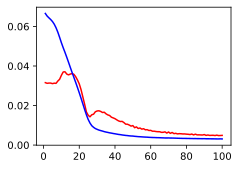

In [8]:
from Dataset import set_figsize

set_figsize((3.5, 2.5))
x = list(range(1, num_epochs+1))
plt.plot(x, test_loss, 'r-')
plt.plot(x, train_loss, 'b')

In [9]:
torch.save(net.state_dict(), 'models/model.pth')